# Loading the Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1Ekttn0UBuUPhDGi3VU-egdG38hrwLNeB
!gdown 1Vt7Stmj4JKn_Y58R1TNAKtOrFDn9D-n2
!gdown 1VZch6GVFaCLBP6NBK0ud3gP5zJcmiM83
!gdown 1w0AmBAe_0pxlT1Jnf1vu6JFdTg5pFQhI
!gdown 1PtJtPSQvSUaQcxvOR4XWWYM0G9zYdRzG
!gdown 1xPU7PjqKpiClCoW0P9Sr3tN6UEAnjIGS

Downloading...
From: https://drive.google.com/uc?id=1Ekttn0UBuUPhDGi3VU-egdG38hrwLNeB
To: /content/X097_FE_time.csv
100% 3.17M/3.17M [00:00<00:00, 23.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Vt7Stmj4JKn_Y58R1TNAKtOrFDn9D-n2
To: /content/X097_DE_time.csv
100% 3.22M/3.22M [00:00<00:00, 28.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VZch6GVFaCLBP6NBK0ud3gP5zJcmiM83
To: /content/X105_FE_time.csv
100% 1.58M/1.58M [00:00<00:00, 18.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1w0AmBAe_0pxlT1Jnf1vu6JFdTg5pFQhI
To: /content/X105_DE_time.csv
100% 1.62M/1.62M [00:00<00:00, 17.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PtJtPSQvSUaQcxvOR4XWWYM0G9zYdRzG
To: /content/X130_DE_time.csv
100% 1.63M/1.63M [00:00<00:00, 16.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xPU7PjqKpiClCoW0P9Sr3tN6UEAnjIGS
To: /content/X118_DE_time.csv
100% 1.64M/1.64M [00:00<00:00, 20.1MB/s]


97 = Normal
105 = Fault

In [ ]:
#97 = normal , 105,118,130 = fault
X097_DE_time = pd.read_csv('X097_DE_time.csv',header=None).values
X105_DE_time = pd.read_csv('X105_DE_time.csv',header=None).values
X118_DE_time = pd.read_csv('X118_DE_time.csv',header=None).values
X130_DE_time = pd.read_csv('X130_DE_time.csv',header=None).values

# Creating the Matrix

In [ ]:
# Define constants
M = 100  # Number of samples per class
N = 200  # Length of each sample
total_samples = M * 4  # Total number of samples (2 classes)

# Randomly select starting points for Normal DE data
healthy_starting_points = np.random.randint(0, len(X097_DE_time) - N, size=M)

# Randomly select starting points for fault DE data
defective_starting_points = np.random.randint(0, len(X105_DE_time) - N, size=M)
defective_starting_points2 = np.random.randint(0, len(X118_DE_time) - N, size=M)
defective_starting_points3 = np.random.randint(0, len(X130_DE_time) - N, size=M)

# Initialize empty arrays to store selected samples and labels
selected_samples = np.zeros((total_samples, N))
labels = np.zeros(total_samples)

# Fill in the selected samples and labels for healthy DE
for i, start_point in enumerate(healthy_starting_points):
    selected_samples[i] = np.squeeze( X097_DE_time[start_point:start_point + N])
    labels[i] = 0  # Label 0 for normal DE

# Fill in the selected samples and labels for fault DE
for i, start_point in enumerate(defective_starting_points):
    selected_samples[i + M] = np.squeeze(X105_DE_time[start_point:start_point + N])
    labels[i + M] = 1  # Label 1 for Falut DE

for i, start_point in enumerate(defective_starting_points2):
    selected_samples[i+ 100 + M] = np.squeeze(X118_DE_time[start_point:start_point + N])
    labels[i+ 100 + M] = 2  # Label 2 for Falut DE

for i, start_point in enumerate(defective_starting_points3):
    selected_samples[i+200 + M] = np.squeeze(X130_DE_time[start_point:start_point + N])
    labels[i+200 + M] = 3  # Label 3 for Falut DE

print(selected_samples.shape)
print(labels.shape)


(400, 200)
(400,)


# Feature Extraction,Shuffling and Normalization

In [ ]:

# Feature extraction methods
def shape_factor(data):
    return np.sqrt(np.mean(np.square(data))) / np.mean(np.abs(data))

def impact_factor(data):
    return np.max(data)/ np.mean(np.abs(data))

def Crest_Factor(data):
    return  np.max(data) / np.sqrt(np.mean(np.square(data)))

def absolute_mean(data):
    return np.mean(np.abs(data))

def root_mean_square(data):
    return np.sqrt(np.mean(np.square(data)))

def impulse_factor(data):
    return np.max(np.abs(data)) / np.mean(np.abs(data))

def standard_deviation(data):
    return np.std(data)

def impact_factor(data):
    return np.max(np.abs(data)) / np.mean(np.abs(data))


# Initialize empty array to store extracted features
num_features = 9
num_samples, sample_length = selected_samples.shape
extracted_features = np.zeros((num_samples, num_features))

# Extract features for each sample
for i in range(num_samples):
    sample = selected_samples[i]
    extracted_features[i, 0] = shape_factor(sample)
    extracted_features[i, 1] = impact_factor(sample)
    extracted_features[i, 2] = Crest_Factor(sample)
    extracted_features[i, 3] = np.mean(sample)
    extracted_features[i, 4] = absolute_mean(sample)
    extracted_features[i, 5] = root_mean_square(sample)
    extracted_features[i, 6] = impulse_factor(sample)
    extracted_features[i, 7] = standard_deviation(sample)
    extracted_features[i, 8] = impact_factor(sample)

# Now we have a new dataset with extracted features
extracted_features


array([[1.20159312, 3.03321651, 2.52432912, ..., 3.03321651, 0.08020056,
        3.03321651],
       [1.22435609, 3.11535782, 2.54448672, ..., 3.11535782, 0.07502556,
        3.11535782],
       [1.21258833, 3.10783923, 2.45140308, ..., 3.10783923, 0.06316812,
        3.10783923],
       ...,
       [1.58461455, 7.30126544, 4.60759713, ..., 7.30126544, 0.42794998,
        7.30126544],
       [1.64532216, 7.40570402, 4.50106624, ..., 7.40570402, 0.60979921,
        7.40570402],
       [1.65094457, 6.28450363, 3.80661093, ..., 6.28450363, 0.55287057,
        6.28450363]])

In [ ]:
# Combine features and labels
data_with_labels = np.column_stack((extracted_features, labels))
print(data_with_labels.shape)
# Shuffle the data
np.random.shuffle(data_with_labels)
data_with_labels

(400, 10)


array([[1.22302266, 3.14748084, 2.24567481, ..., 0.15097848, 3.14748084,
        2.        ],
       [1.35930934, 5.49604837, 4.04326536, ..., 0.29235397, 5.49604837,
        1.        ],
       [1.50046834, 6.8385056 , 4.55758073, ..., 0.28717146, 6.8385056 ,
        1.        ],
       ...,
       [1.38425342, 5.72767955, 4.13773913, ..., 0.32743324, 5.72767955,
        1.        ],
       [1.47372717, 5.96890535, 4.05021056, ..., 0.32430959, 5.96890535,
        1.        ],
       [1.20596014, 3.36022858, 2.78635127, ..., 0.06049071, 3.36022858,
        0.        ]])

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Extract features and labels
features = data_with_labels[:, :-1]  # All columns except the last one
labels = data_with_labels[:, -1]  # The last column

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Split the data into training, validation, and test sets
# First, split the data into 80% training+validation and 20% test
features_train_val, features_test, labels_train_val, labels_test = train_test_split(
    standardized_features, labels, test_size=0.2, random_state=64, stratify=labels)

# Then, split the training+validation set into 80% training and 20% validation
features_train, features_val, labels_train, labels_val = train_test_split(
    features_train_val, labels_train_val, test_size=0.25, random_state=64, stratify=labels_train_val)

print("Training set shape:", features_train.shape)
print("Validation set shape:", features_val.shape)
print("Test set shape:", features_test.shape)


Training set shape: (240, 9)
Validation set shape: (80, 9)
Test set shape: (80, 9)


# MLP :

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report , ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the MLP model
model = Sequential([
    Dense(64, activation='elu', input_shape=(features_train.shape[1],)),
    Dense(32, activation='elu'),
    Dense(4, activation='softmax')  # 4 classes for classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(features_train, labels_train, epochs=100, batch_size=64,
                    validation_data=(features_val, labels_val))


Epoch 1/100
4/4 [==============================] - 1s 81ms/step - loss: 1.2070 - accuracy: 0.5542 - val_loss: 0.9963 - val_accuracy: 0.7000
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 0.9166 - accuracy: 0.6875 - val_loss: 0.8017 - val_accuracy: 0.7250
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7633 - accuracy: 0.6917 - val_loss: 0.6918 - val_accuracy: 0.7125
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6726 - accuracy: 0.7333 - val_loss: 0.6273 - val_accuracy: 0.7500
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6159 - accuracy: 0.7917 - val_loss: 0.5851 - val_accuracy: 0.8250
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5820 - accuracy: 0.7792 - val_loss: 0.5548 - val_accuracy: 0.8500
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5547 - accuracy: 0.8000 - val_loss: 0.5301 - val_accuracy: 0.8375
Epoch 8/100
4/4 [===

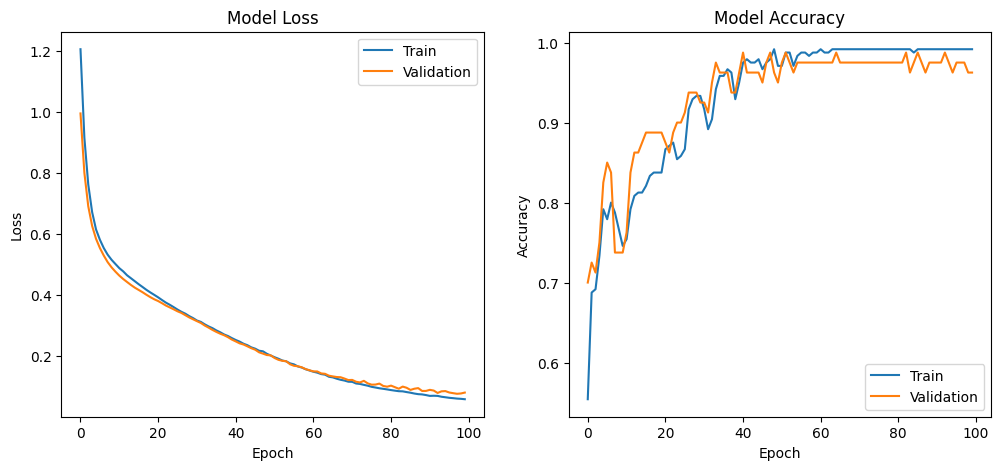

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(features_test, labels_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Test Loss: 0.06846876442432404
Test Accuracy: 0.987500011920929


3/3 [==============================] - 0s 4ms/step


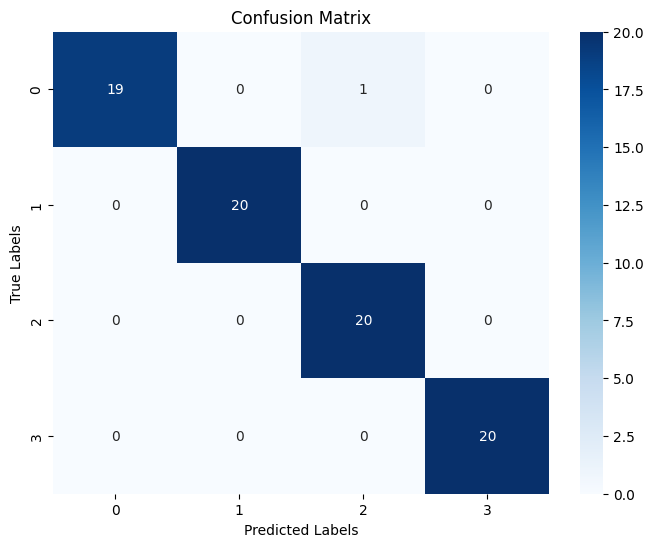

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        20
         1.0       1.00      1.00      1.00        20
         2.0       0.95      1.00      0.98        20
         3.0       1.00      1.00      1.00        20

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Predict the labels for the test set
labels_pred = np.argmax(model.predict(features_test), axis=1)


# Assuming labels_test and labels_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(labels_test, labels_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Classification Report
class_report = classification_report(labels_test, labels_pred)
print("Classification Report:")
print(class_report)


# MLP with another Optimizer and Loss Function :

Epoch 1/100
4/4 [==============================] - 1s 67ms/step - loss: 4.4711 - accuracy: 0.0292 - val_loss: 4.4316 - val_accuracy: 0.0500
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 4.4066 - accuracy: 0.0250 - val_loss: 4.3814 - val_accuracy: 0.0625
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 4.3607 - accuracy: 0.0208 - val_loss: 4.3434 - val_accuracy: 0.0625
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 4.3261 - accuracy: 0.0375 - val_loss: 4.3147 - val_accuracy: 0.0625
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 4.2996 - accuracy: 0.0333 - val_loss: 4.2922 - val_accuracy: 0.0750
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 4.2789 - accuracy: 0.0417 - val_loss: 4.2742 - val_accuracy: 0.0750
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 4.2623 - accuracy: 0.0583 - val_loss: 4.2596 - val_accuracy: 0.0875
Epoch 8/100
4/4 [===

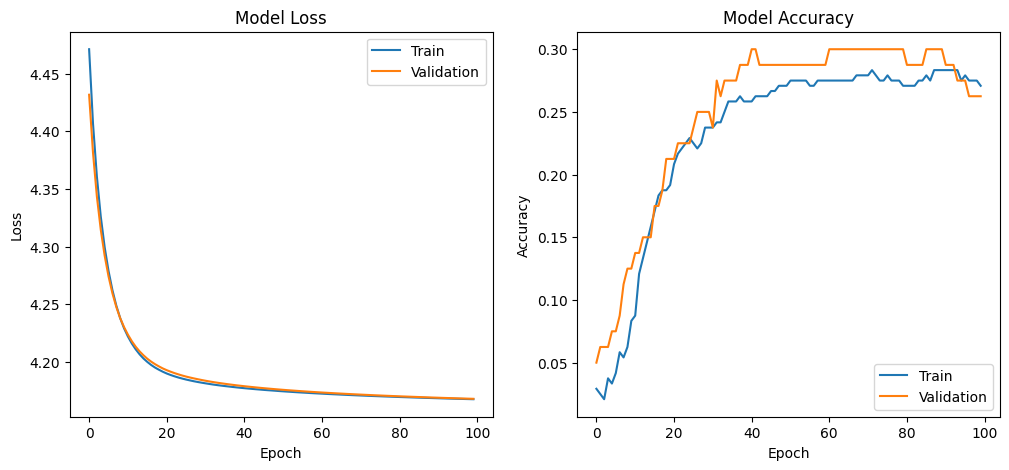

Test Loss: 4.170943260192871
Test Accuracy: 0.26249998807907104
3/3 [==============================] - 0s 4ms/step


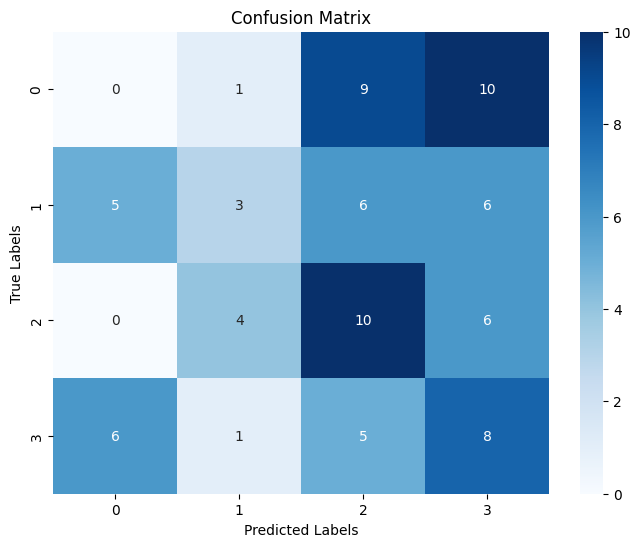

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        20
         1.0       0.33      0.15      0.21        20
         2.0       0.33      0.50      0.40        20
         3.0       0.27      0.40      0.32        20

    accuracy                           0.26        80
   macro avg       0.23      0.26      0.23        80
weighted avg       0.23      0.26      0.23        80



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop , Adagrad
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import KLDivergence

# Define the MLP model
model = Sequential([
    Dense(64, activation='elu', input_shape=(features_train.shape[1],)),
    Dense(32, activation='elu'),
    Dense(4, activation='softmax')  # 4 classes for classification
])

# Compile the model
model.compile(optimizer=Adagrad(), loss=KLDivergence(), metrics=['accuracy'])

# Train the model
history = model.fit(features_train, labels_train, epochs=100, batch_size=64,
                    validation_data=(features_val, labels_val))

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(features_test, labels_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')




# Predict the labels for the test set
labels_pred = np.argmax(model.predict(features_test), axis=1)


# Assuming labels_test and labels_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(labels_test, labels_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Classification Report
class_report = classification_report(labels_test, labels_pred)
print("Classification Report:")
print(class_report)


# MLP with K-Fold Stratified

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Define the number of splits for Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=64)

# Store confusion matrices and classification reports for later analysis
confusion_matrices = []
classification_reports = []

# Lists to store histories of training and validation metrics for each fold
all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []

# Stratified K-Fold Cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(features, labels)):
    print(f"Training fold {fold+1}/{n_splits}")

    # Split data into training and validation sets
    features_train, features_val = features[train_index], features[val_index]
    labels_train, labels_val = labels[train_index], labels[val_index]

    # Define the MLP model
    model = Sequential([
        Dense(64, activation='elu', input_shape=(features_train.shape[1],)),
        Dense(32, activation='elu'),
        Dense(4, activation='softmax')  # 4 classes for classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(features_train, labels_train, epochs=100, batch_size=64,
                        validation_data=(features_val, labels_val), verbose=0)

    # Append fold history
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])
    all_train_accuracies.append(history.history['accuracy'])
    all_val_accuracies.append(history.history['val_accuracy'])

    # Generate confusion matrix and classification report for this fold
    predictions = model.predict(features_val)
    predicted_labels = np.argmax(predictions, axis=1)
    confusion_matrices.append(confusion_matrix(labels_val, predicted_labels))
    classification_reports.append(classification_report(labels_val, predicted_labels, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))




Training fold 1/5
3/3 [==============================] - 0s 4ms/step
Training fold 2/5
3/3 [==============================] - 0s 6ms/step
Training fold 3/5
3/3 [==============================] - 0s 4ms/step
Training fold 4/5
3/3 [==============================] - 0s 6ms/step
Training fold 5/5
3/3 [==============================] - 0s 4ms/step


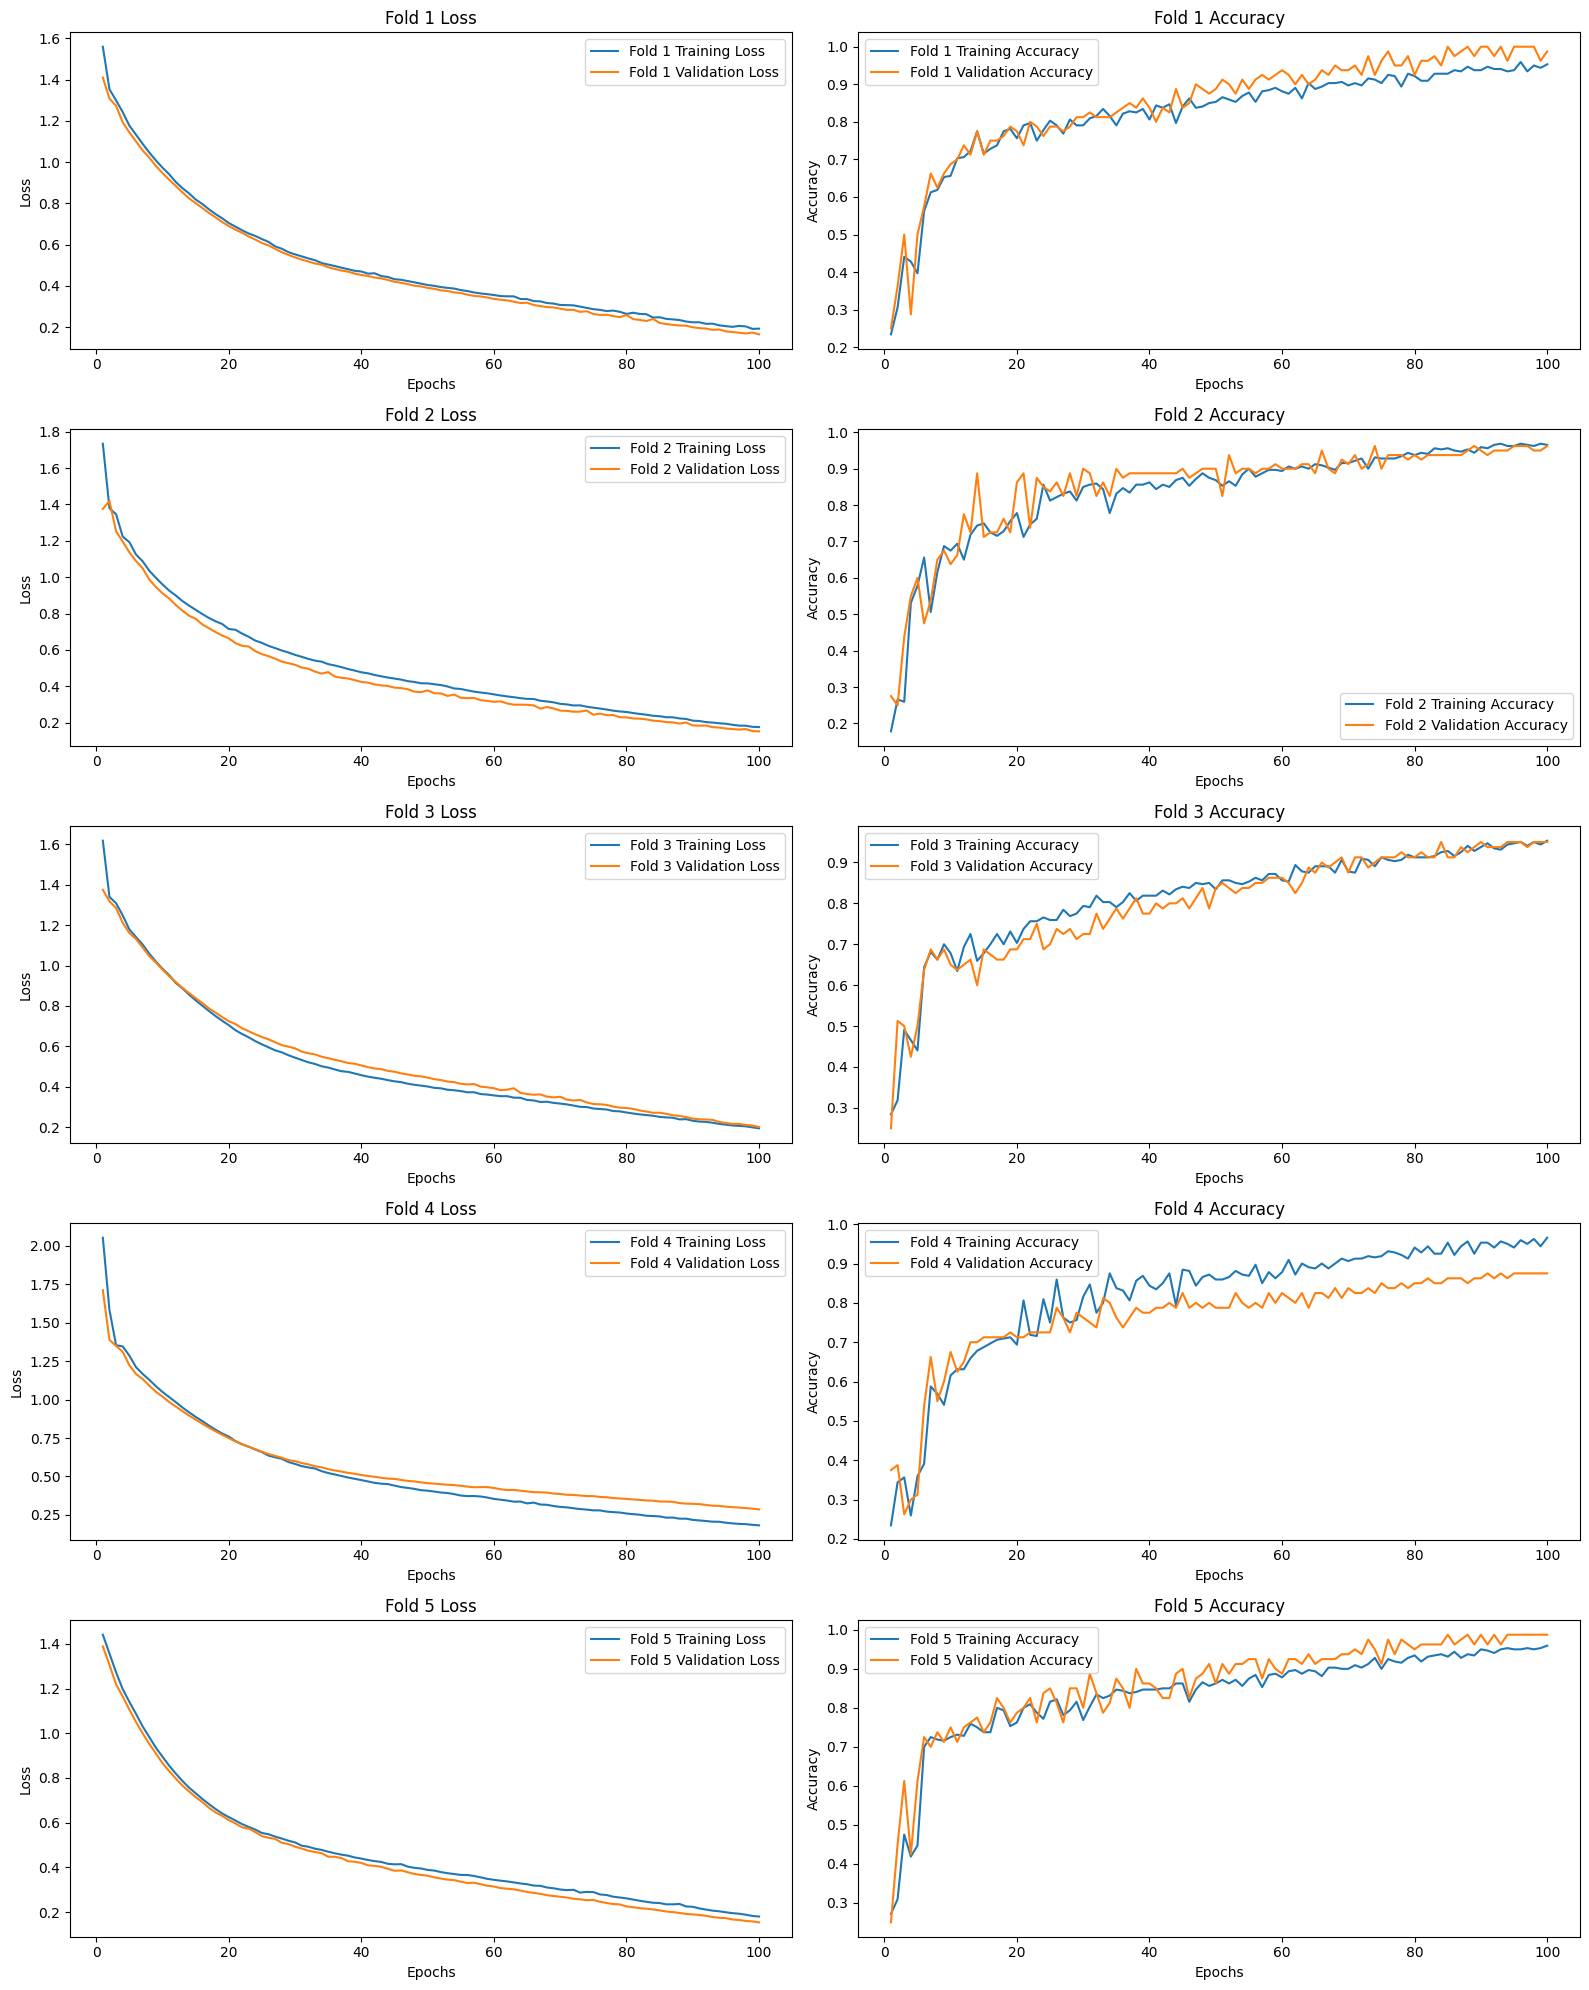

In [ ]:

# Plot loss and accuracy graphs for each fold
epochs = range(1, 101)
plt.figure(figsize=(16, 20))

for fold in range(len(all_train_losses)):
    plt.subplot(len(all_train_losses), 2, 2*fold+1)
    plt.plot(epochs, all_train_losses[fold], label=f'Fold {fold+1} Training Loss')
    plt.plot(epochs, all_val_losses[fold], label=f'Fold {fold+1} Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold+1} Loss')
    plt.legend()

    plt.subplot(len(all_train_losses), 2, 2*fold+2)
    plt.plot(epochs, all_train_accuracies[fold], label=f'Fold {fold+1} Training Accuracy')
    plt.plot(epochs, all_val_accuracies[fold], label=f'Fold {fold+1} Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold+1} Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


Fold 1 - Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.95      0.97        20
     Class 1       1.00      1.00      1.00        20
     Class 2       0.95      1.00      0.98        20
     Class 3       1.00      1.00      1.00        20

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



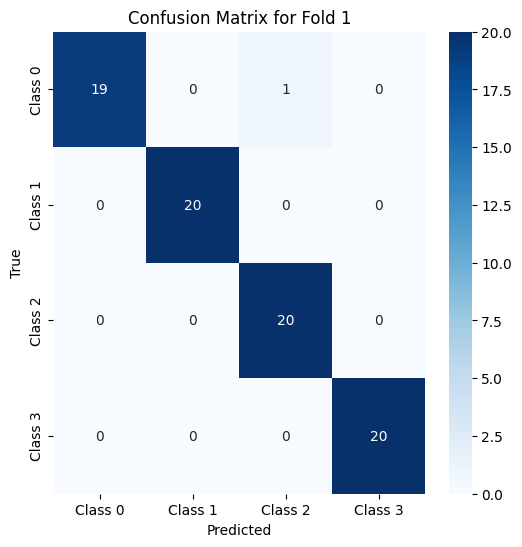

Fold 2 - Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.90      0.92        20
     Class 1       1.00      1.00      1.00        20
     Class 2       0.90      0.95      0.93        20
     Class 3       1.00      1.00      1.00        20

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



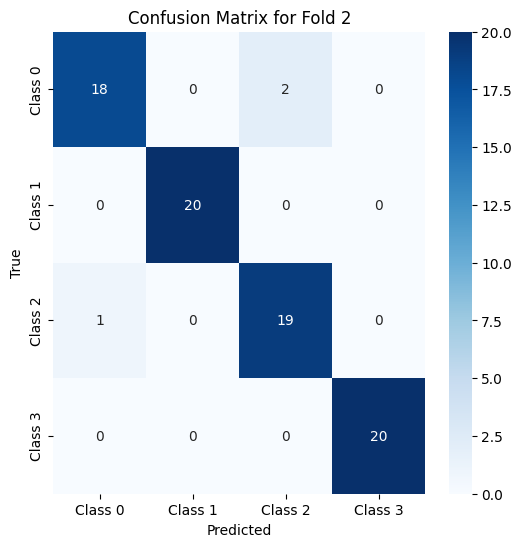

Fold 3 - Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.98        20
     Class 1       0.90      0.95      0.93        20
     Class 2       0.95      0.90      0.92        20
     Class 3       1.00      0.95      0.97        20

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



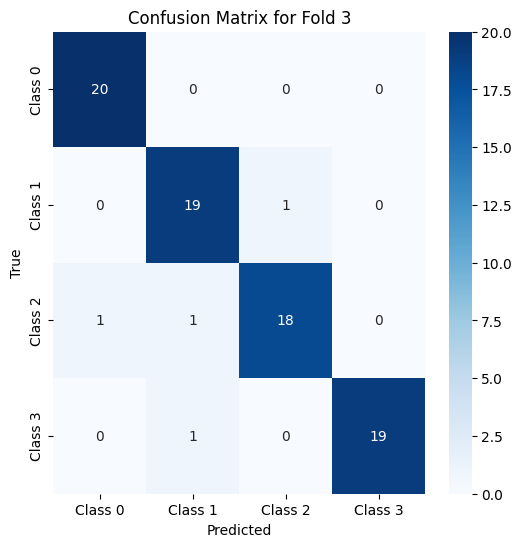

Fold 4 - Classification Report:
              precision    recall  f1-score   support

     Class 0       0.76      0.80      0.78        20
     Class 1       0.95      1.00      0.98        20
     Class 2       0.78      0.70      0.74        20
     Class 3       1.00      1.00      1.00        20

    accuracy                           0.88        80
   macro avg       0.87      0.88      0.87        80
weighted avg       0.87      0.88      0.87        80



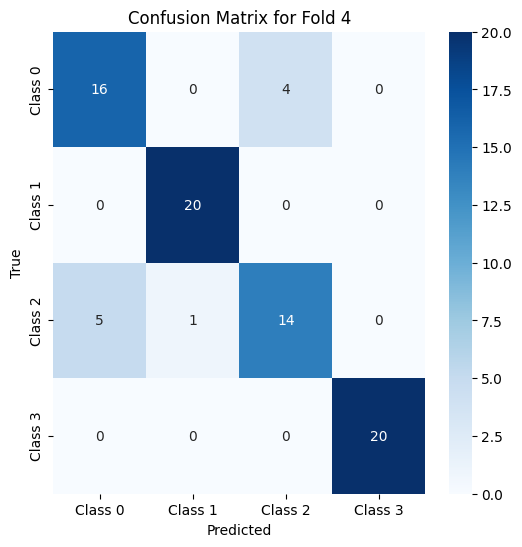

Fold 5 - Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.95      0.97        20
     Class 1       1.00      1.00      1.00        20
     Class 2       0.95      1.00      0.98        20
     Class 3       1.00      1.00      1.00        20

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



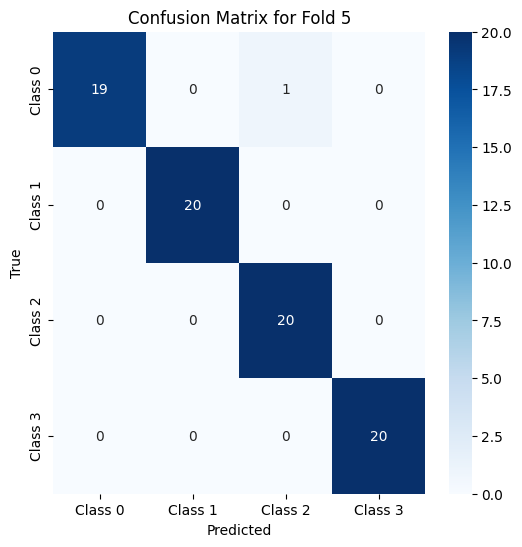

In [ ]:
# Analyze confusion matrices and classification reports
for i, (cm, report) in enumerate(zip(confusion_matrices, classification_reports)):

    print(f"Fold {i+1} - Classification Report:")
    print(report)


    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Fold {i+1}')
    plt.show()